# Final project

### Description:

This is the Week 7 Final project for the course introduction to Machine Learning: Supervised Learning.
Dataset used in this project is : <a href="https://www.kaggle.com/datasets/vikasukani/parkinsons-disease-data-set/data">dataset that tracked patients with Parkinson's Disease</a>.

Citation: Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008), 'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', IEEE Transactions on Biomedical Engineering (to appear).


#### About the data:
This dataset is composed of a range of biomedical voice measurements from 31 people ,23 with Parkinson's disease. Each column is a voice measure. 'status' column is the health status, 0 for healthy and 1 for parkinson's disease.
Attribute information :
    Matrix column entries (attributes):
    name - ASCII subject name and recording number
    MDVP:Fo(Hz) - Average vocal fundamental frequency
    MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
    MDVP:Flo(Hz) - Minimum vocal fundamental frequency
    MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency
    MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
    NHR, HNR - Two measures of the ratio of noise to tonal components in the voice
    status - The health status of the subject (one) - Parkinson's, (zero) - healthy
    RPDE, D2 - Two nonlinear dynamical complexity measures
    DFA - Signal fractal scaling exponent
    spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [235]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

### EDA

In [236]:
# Load data and take a look at the first 5 rows
parkinsons_df = pd.read_csv('parkinsons.data')
pd.set_option('display.max_columns',25)
parkinsons_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


The value scale of columns differ sigificantly.
such as Jitter(Abs) and HNR, need to scale the data.

In [237]:
parkinsons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

There are 195 rows and 24 columns data from 31 patients.It contains subject's name, biomedical voice measures and subject's health status (0 for healthy, 1 for parkinsons' disease).
The purpose is to predict health status using biomedical voice measures.

In [238]:
parkinsons_df.describe(include='all')

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
unique,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,phon_R01_S01_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,NaN,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,NaN,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,NaN,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,NaN,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,NaN,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980


In [239]:
# name column is not really useful in the model, delete name column
parkinsons_df.drop('name',axis=1,inplace=True)
parkinsons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [240]:
# Take a look at the correlations 
print(parkinsons_df.corr())

                  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.101095        0.725561   

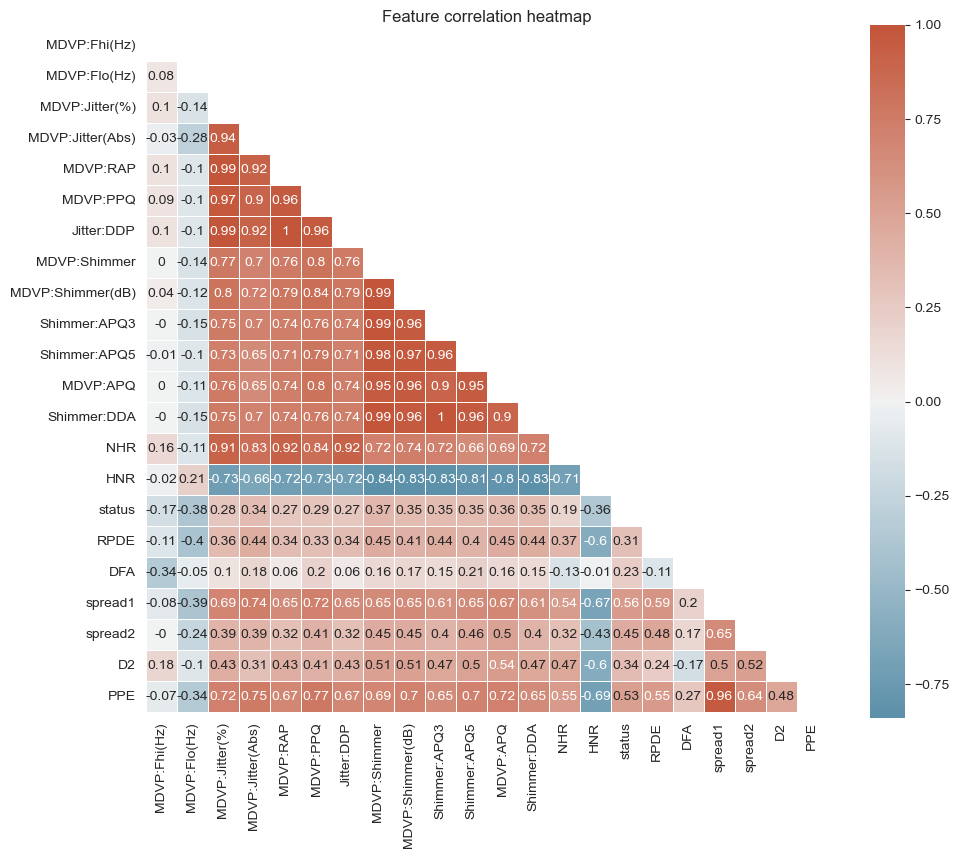

In [241]:
# Compute the correlation matrix
corr_list = parkinsons_df.columns[1:]
corr = parkinsons_df[corr_list].corr().round(2)
# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr,dtype=bool))
# Set a style
sns.set_style('white')
f,ax = plt.subplots(figsize=(11,9))
# Diverging colormap
cmap = sns.diverging_palette(230,20,as_cmap=True)

sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True,annot=True,linewidths=0.5)
plt.title('Feature correlation heatmap');

###### About the feature correlations:
    1. MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP have high correlation with each other which is not surprising as they are just different measures of variation in fundamental frequency.
    2. MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA have high correlation with each other as they are just different measures of variation in amplitude.
    3. Jitter variation measures are positively correlated with shimmer variation measures.
    4. NHR and HNR are negatively correlated with each other. NHR is highly positively correlated with other features and HNR is highly negatively related with other features. 
    5. RPDE and PPE are mostly postively corrlated with other features except HNR,MDVP:Fo(Hz),MDVP:Flo(Hz).
    6. DFA are slightly positively correlated with other features, but not very strong correlation.
    7. spread 1 and spread 2 are mostly positive correlated with other features except HNR,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz). spread 1 has stronger correlation with other features compared with spread 2.
    8. D2 are mostly positively correlated with other features.

#### data cleaning and preparing 

In [242]:
# Check miss values
print(parkinsons_df.isnull().sum())

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


There is no missing values.

In [243]:
# fundamental frequencies
f = f = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']
px.box(parkinsons_df[f])


#####
    1.The distribution of MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz) columns are all right-skewed.
    2.The average vocal fundamental frequency MDVP:Fo(Hz) range from 88.33 to 260.1, the median is 148.79.
    3.The maximum vocal fundamental frequency MDVP:Fhi(Hz) range from 102 to 592, the median is 175.8 and there are some outlier.
    4.The minimum vocal fundamental frequency VMDVP:Flo(Hz) range from 65.4 to 239.17, the median is 104.3.

In [244]:
# Check  variation in fundamental frequencies 
f = ['MDVP:Jitter(%)','MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP']
px.box(parkinsons_df[f])

##### 
    1.The distribution of MDVP:Jitter(%), MDVP:RAP, MDVP:PPQ, Jitter:DDP columns are all right-skewed.
    2.There are outlier in these 4 columns too, espically in Jitter:DDP
    3.The values of Jitter group are very small, the medians are below 0.01.

In [245]:
# check variation in fundamental amplitude
f=['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA']
px.box(parkinsons_df[f])

##### 
    1.The distribution of MDVP:Shimmer, MDVP:Shimmer(dB), MDVP:APQ, Shimmer:DDA columns are all right-skewed.
    2.There are some outliers in MDVP:Shimmer(dB) column.

In [246]:
# check NHR,HNR,RPDE,DFA columns
f=['NHR', 'HNR', 'RPDE', 'DFA']
px.box(parkinsons_df[f])

##### 
    1.The distribution of NHR, RPDE, DFA columns are all very consentrated, no obvious skewness.
    2.The HNR column has some outlier in the left tail and its median is around 22.

In [247]:
f=['spread1', 'spread2', 'D2', 'PPE']
px.box(parkinsons_df[f])

##### 
    1.The spread1 column are all negative with few  outlier on the right tail.
    2.The D2 column has one outlier on the right tail.
    3.Spread2 and PPE have similar distributions and the medians are around 0.2. 

In [248]:
# define the target and features:
target_label = ['status']
feature_labels = [x for x in parkinsons_df.columns if x not in target_label ]

In [249]:
# Train-test-split the data
X_train, X_test, y_train, y_test = train_test_split(parkinsons_df[feature_labels],
                                                    parkinsons_df[target_label], test_size=0.2,random_state=401)

In [250]:
# training data scaling
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)

In [251]:
# test data scaling
scaler = StandardScaler()
X_test_scaled=scaler.fit_transform(X_test)

In [252]:
# prepare data for model
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

(156, 22) (39, 22) (156, 1) (39, 1)


In [253]:
# Model training
CLF = RandomForestClassifier(max_depth=3,random_state=401)
CLF.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=3, random_state=401)

In [254]:
# make a prediction
pred = CLF.predict(X_test_scaled)

In [265]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))
print(f'The model accuracy for the training data is {CLF.score(X_train_scaled,y_train):.3f}')
print(f'The model accuracy for the testing data is {CLF.score(X_test_scaled,y_test):.3f}')

[[ 7  4]
 [ 0 28]]
The model accuracy for the training data is 0.955
The model accuracy for the testing data is 0.897


The model has a good accuray. 

In [256]:
print(f'The features used in the model are :{feature_labels}')

The features used in the model are :['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


<BarContainer object of 22 artists>

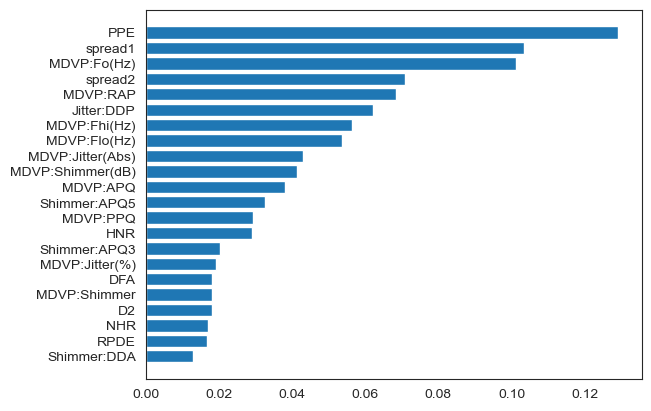

In [257]:
# plot the model importance 
f_i = list(zip(feature_labels,CLF.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

### Summary of your results

####
 1. After try and adjust different model parameters, max_depth=3 is the best choose in this case. 
 2. The modle has a training acccuracy score of 0.96, testing accuracy of 0.90.
 3. With max_depth value increase (bigger than 4), model traning accuracy reaches to 1 and testing accuracy stays constant at 0.94. It is overfitting. If reduces the max_depth of the model parameters, the model accuracy reduces to 0.8.
 4. PPE,spread1,MDVP:Fo(Hz) are the top 3 important features.

In [258]:
from sklearn.feature_selection import RFECV
rfe = RFECV(CLF,cv=5,scoring='neg_mean_squared_error')
rfe.fit(X_train_scaled,y_train)
selected_features = np.array(feature_labels)[rfe.get_support()]

In [259]:
selected_features

array(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)',
       'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer(dB)',
       'Shimmer:APQ5', 'MDVP:APQ', 'RPDE', 'DFA', 'spread1', 'spread2',
       'D2', 'PPE'], dtype='<U16')

In [260]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]
X_train1_scaled = scaler.fit_transform(X_train1)
X_test1_scaled = scaler.fit_transform(X_test1)
print(X_train1_scaled.shape, X_test1_scaled.shape, y_train.shape, y_test.shape)


(156, 16) (39, 16) (156,) (39,)


In [264]:
CLF1 = RandomForestClassifier(max_depth=3,random_state=401)
CLF1.fit(X_train1_scaled,y_train)
pred = CLF1.predict(X_test1_scaled)
print(confusion_matrix(y_test,pred))
print(f'The model accuracy for the training data is {CLF1.score(X_train1_scaled,y_train):.3f}')
print(f'The model accuracy for the testing data is {CLF1.score(X_test1_scaled,y_test):.3f}')

[[ 7  4]
 [ 0 28]]
The model accuracy for the training data is 0.949
The model accuracy for the testing data is 0.897


<BarContainer object of 16 artists>

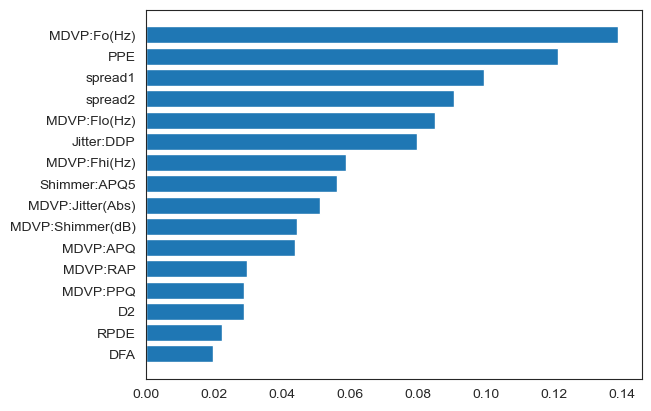

In [263]:
f_i = list(zip(selected_features,CLF1.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
